In [1]:
import pandas as pd
import numpy as np
import sklearn

In [3]:
df = pd.read_csv('/content/UCI_Credit_Card.csv')
pd.options.display.max_columns = 25
df.head(15)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


#Data description

In [4]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


#Feature engineering

In [8]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

##Баланс количества записей по целевой переменной

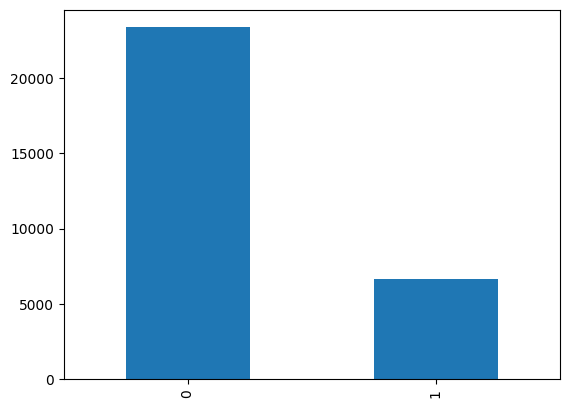

In [9]:
default = df['default.payment.next.month'].value_counts()
ax = default.plot.bar()

**Значительный дисбаланс в сторону отсутствия дефолта платежа в следующем месяце**

##Баланс количества записей по полу нормальный

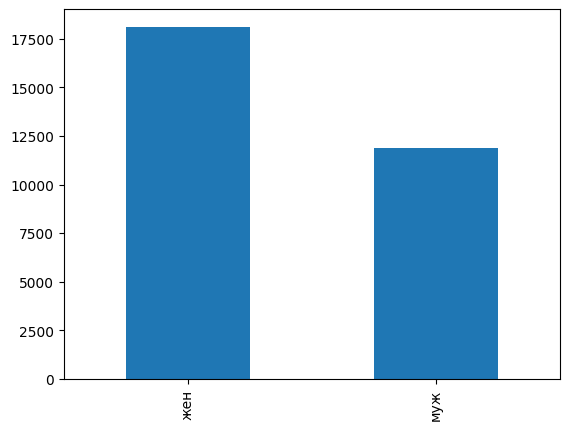

In [10]:
sex = df['SEX'].map({1: 'муж', 2: 'жен'}).value_counts()
ax = sex.plot.bar()

**Баланс нормальный**

##Баланс количества записей по ступени обучения

In [11]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

**Наличие лишнего класса (расхождение с ТЗ)**

In [12]:
df = df.drop(df[df.EDUCATION == 0].index)

**Ступение обучения под кодами 5 и 6 имеют один смысл, поэтому объединим их**

In [13]:
df['EDUCATION'] = df['EDUCATION'].map({1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 5})

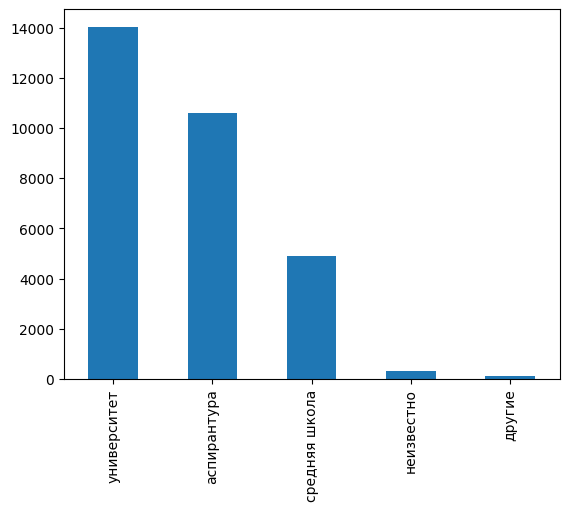

In [14]:
education = df['EDUCATION'].map({1: 'аспирантура', 2: 'университет', 3: 'средняя школа', 4: 'другие', 5: 'неизвестно'}).value_counts()
ax = education.plot.bar()

**Баланс очень плохой, возможно стоит объединить "неизвестно" и "другие" или же убрать их**

In [15]:
df = df.drop(df[df.EDUCATION.isin([4, 5])].index)

##Баланс количества записей по семейному положению

In [16]:
df['MARRIAGE'].value_counts()

2    15738
1    13425
3      315
0       54
Name: MARRIAGE, dtype: int64

**Снова расхождение количества классов и ТЗ**

In [17]:
df = df.drop(df[df.MARRIAGE == 0].index)

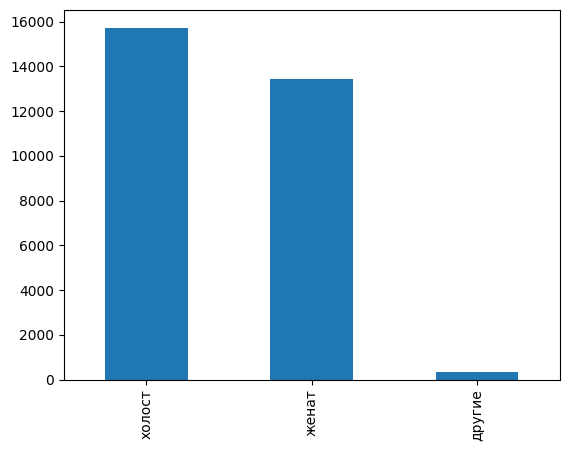

In [18]:
marriage = df['MARRIAGE'].map({1: 'женат', 2: 'холост', 3: 'другие'}).value_counts()
ax = marriage.plot.bar()

**Хороший баланс относительно "холост" и "женат", но "другие возможно стоит убрать**

In [19]:
df = df.drop(df[df.MARRIAGE == 3].index)

##Рассмотрим возраста

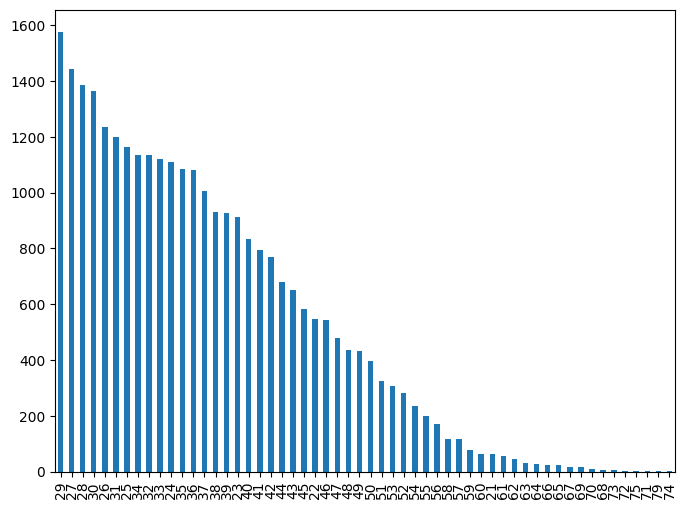

In [20]:
age = df['AGE'].value_counts()
ax = age.plot.bar(figsize=(8,6))

In [21]:
df['AGE'].describe()

count    29163.000000
mean        35.390563
std          9.181333
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

**Поскольку записи крайне не сбалансированы относительно возраста, стоит объединить возраста в группы**

In [22]:
conditions = [
    (df['AGE'] < 25),
    (df['AGE'] >= 25) & (df['AGE'] < 30),
    (df['AGE'] >= 30) & (df['AGE'] < 40),
    (df['AGE'] >= 40) & (df['AGE'] < 50),
    (df['AGE'] >= 50)
]

choices = [0, 1, 2, 3, 4]

df['AGE'] = np.select(conditions, choices)
df['AGE'].value_counts()

2    10981
1     6803
3     6197
0     2632
4     2550
Name: AGE, dtype: int64

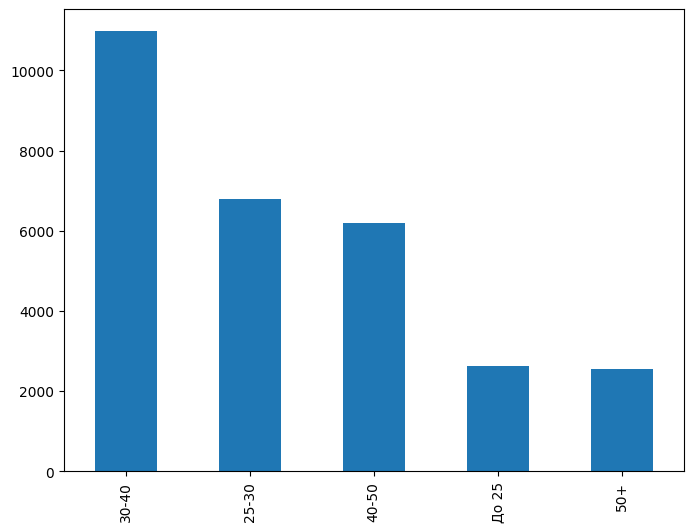

In [23]:
age = df['AGE'].map({0: 'До 25', 1: '25-30', 2: '30-40', 3: '40-50', 4: '50+'}).value_counts()
ax = age.plot.bar(figsize=(8,6))

**Так выглядит лучше :)**

##Рассмотрим статус погашения

In [24]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].nunique()

PAY_0    11
PAY_2    11
PAY_3    11
PAY_4    11
PAY_5    10
PAY_6    10
dtype: int64

<Axes: >

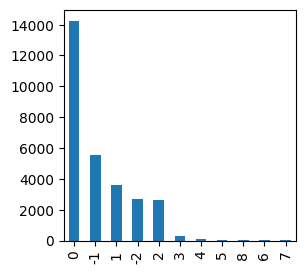

In [25]:
df['PAY_0'].value_counts().plot.bar(figsize=(3,3))

<Axes: >

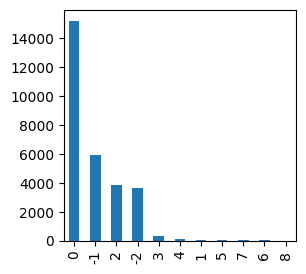

In [26]:
df['PAY_2'].value_counts().plot.bar(figsize=(3,3))

<Axes: >

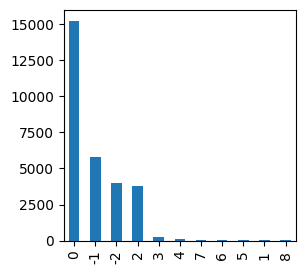

In [27]:
df['PAY_3'].value_counts().plot.bar(figsize=(3,3))

<Axes: >

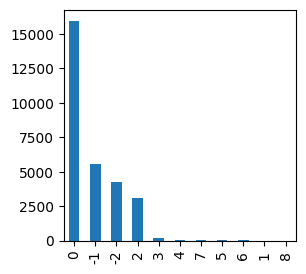

In [28]:
df['PAY_4'].value_counts().plot.bar(figsize=(3,3))

<Axes: >

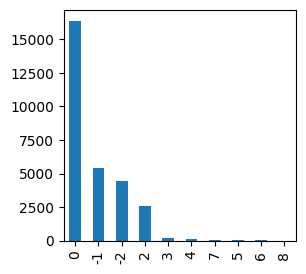

In [29]:
df['PAY_5'].value_counts().plot.bar(figsize=(3,3))

<Axes: >

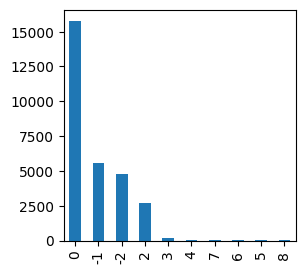

In [30]:
df['PAY_6'].value_counts().plot.bar(figsize=(3,3))

**Имеются две переменные не указанные в ТЗ, такие как: 0 и -2. Поскольку кол-во записей там крайне большое, необходимо выяснить означают они задержку или же нет. Также стоит отметить очень плохой баланс классов, думаю, стоит разделить их на своевременную выплату и выплату с задержкой**

**Поскольку нам известно, что -1 является своевременной выплатой, которая, в теории, ведет к отсутствию дефолта платежа, то будем считать, что если во всех PAY указан своевременный платеж, то целевая переменная должна быть 0, что будет подтверждаться бОльшим кол-вом записей.**

In [31]:
df['default.payment.next.month'][(df.PAY_0 == -1) & (df.PAY_2 == -1) & (df.PAY_3 == -1) & (df.PAY_4 == -1) & (df.PAY_5 == -1) & (df.PAY_6 == -1)].value_counts()

0    1674
1     284
Name: default.payment.next.month, dtype: int64

**Как мы видем из примера со значением -1 теория, в целом, верна. Теперь проверим неизвестные переменные**

In [32]:
df['default.payment.next.month'][(df.PAY_0 == 0) & (df.PAY_2 == 0) & (df.PAY_3 == 0) & (df.PAY_4 == 0) & (df.PAY_5 == 0) & (df.PAY_6 == 0)].value_counts()

0    8507
1     990
Name: default.payment.next.month, dtype: int64

**0 однозначно является своевременным платежем**

In [33]:
df['default.payment.next.month'][(df.PAY_0 == -2) & (df.PAY_2 == -2) & (df.PAY_3 == -2) & (df.PAY_4 == -2) & (df.PAY_5 == -2) & (df.PAY_6 == -2)].value_counts()

0    1763
1     277
Name: default.payment.next.month, dtype: int64

**-2 тоже является своевременным платежем**

In [34]:
df['default.payment.next.month'][(df.PAY_0.isin([0, -1, -2])) & (df.PAY_2.isin([0, -1, -2])) & (df.PAY_3.isin([0, -1, -2])) & (df.PAY_4.isin([0, -1, -2])) & (df.PAY_5.isin([0, -1, -2])) & (df.PAY_6.isin([0, -1, -2]))].value_counts()

0    17030
1     2275
Name: default.payment.next.month, dtype: int64

**Пойдем от обратного и подтвердим эту теорию**

In [35]:
df['default.payment.next.month'][(~df.PAY_0.isin([0, -1, -2])) & (~df.PAY_2.isin([0, -1, -2])) & (~df.PAY_3.isin([0, -1, -2])) & (~df.PAY_4.isin([0, -1, -2])) & (~df.PAY_5.isin([0, -1, -2])) & (~df.PAY_6.isin([0, -1, -2]))].value_counts()

1    929
0    389
Name: default.payment.next.month, dtype: int64

**Да, в целом, все выглядит валидно, поэтому объединим 0, -1, -2 в своевременный платеж (0), а все остальные в платеж с задержкой (1)**

In [36]:
df['PAY_0'] = df['PAY_0'].map({-2: 0, -1: 0, 0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1})
df['PAY_2'] = df['PAY_2'].map({-2: 0, -1: 0, 0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1})
df['PAY_3'] = df['PAY_3'].map({-2: 0, -1: 0, 0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1})
df['PAY_4'] = df['PAY_4'].map({-2: 0, -1: 0, 0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1})
df['PAY_5'] = df['PAY_5'].map({-2: 0, -1: 0, 0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1})
df['PAY_6'] = df['PAY_6'].map({-2: 0, -1: 0, 0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1})
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(pd.Series.value_counts)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,22498,24799,25020,25711,26231,26131
1,6665,4364,4143,3452,2932,3032


**Стоит принять во внимание очень плохой баланс записей по классам в стоблцах PAY**

In [37]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,0,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,1,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,2,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,2,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,4,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#Разделим наши данные на обучающую и тестовую выборку

In [38]:
y = df['default.payment.next.month']
X = df.drop(['ID', 'default.payment.next.month'], axis = 1)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y, shuffle = True, random_state=42)

#Построение моделей

##Логистическая регрессия

###Baseline

In [40]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(class_weight='balanced')
LR.fit(X_train, y_train)
LR_preds = LR.predict(X_test)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LR_preds))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      7474
           1       0.32      0.35      0.34      2150

    accuracy                           0.69      9624
   macro avg       0.57      0.57      0.57      9624
weighted avg       0.70      0.69      0.70      9624



###GridSearch

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

skf = StratifiedShuffleSplit(n_splits=5, random_state=10)

params = {
    'C': np.linspace(0.1, 1.0, 10),
    'fit_intercept': [True, False],
    'solver': ['lbfgs', 'liblinear']
}

grid_search = GridSearchCV(LR, params, cv=skf, scoring='f1_macro', refit = True, n_jobs = -1)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best f1_macro:", grid_search.best_score_)

Best Hyperparameters: {'C': 0.9, 'fit_intercept': False, 'solver': 'liblinear'}
Best f1_macro: 0.6321867354949825


In [48]:
LR = LogisticRegression(C = 0.9, fit_intercept = False, solver = 'liblinear', class_weight='balanced')
LR.fit(X_train, y_train)
LR_preds = LR.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, LR_preds))

              precision    recall  f1-score   support

           0       0.86      0.58      0.69      7474
           1       0.32      0.68      0.43      2150

    accuracy                           0.60      9624
   macro avg       0.59      0.63      0.56      9624
weighted avg       0.74      0.60      0.63      9624



##Дерево решений

###Baseline

In [49]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(class_weight='balanced')
tree.fit(X_train, y_train)
tree_preds = tree.predict(X_test)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_preds))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      7474
           1       0.38      0.37      0.38      2150

    accuracy                           0.73      9624
   macro avg       0.60      0.60      0.60      9624
weighted avg       0.72      0.73      0.73      9624



###GridSearch

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

skf = StratifiedShuffleSplit(n_splits=5, random_state=10)

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, 30, 40, 50, 100],
}

grid_search = GridSearchCV(tree, params, cv=skf, scoring='f1_macro', refit = True, n_jobs = -1)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best f1_macro:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20}
Best f1_macro: 0.6291746623814792


In [61]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(class_weight='balanced', max_depth = 20)
tree.fit(X_train, y_train)
tree_preds = tree.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, tree_preds))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      7474
           1       0.40      0.49      0.44      2150

    accuracy                           0.73      9624
   macro avg       0.62      0.64      0.63      9624
weighted avg       0.75      0.73      0.73      9624

